In [12]:
# 根据MOD文件整理各离子通道的门控动力学（公式和参数全部来自MOD文件）

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 创建电位数组
v = np.arange(-300.0, 300, 0.01)

In [15]:
# Im离子通道

# 初始化参数
g_max = 0.00001                                             # 最大电导（S/cm²）
T = 34                                                      # 目标温度（℃）
T_base = 21                                                 # 初始温度（℃）
Q10 = 2.3                                                   # 温度升高10℃的速率比
qt = Q10 ** ((T - T_base) / 10)                             # 温度因子（也称作纠错率 corrected rates）

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
mAlpha = 3.3e-3 * np.exp(2.5 * 0.04 * (v + 35))
mBeta = 3.3e-3 * np.exp(-2.5 * 0.04 * (v + 35))
mInf = mAlpha / (mAlpha + mBeta)
mTau = (1 / (mAlpha + mBeta)) / qt

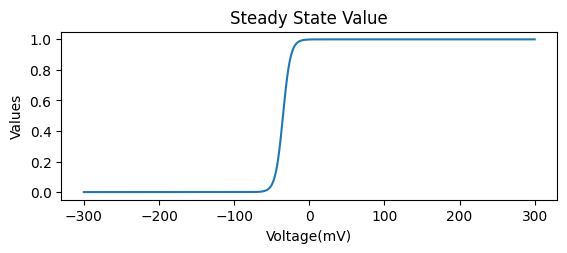

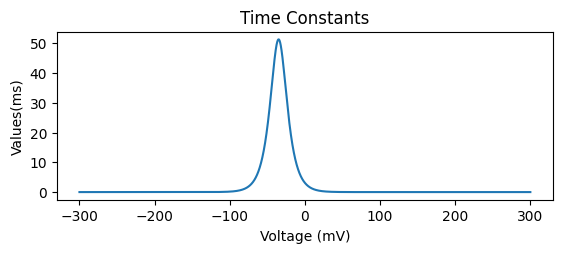

In [16]:
# 绘图
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, mTau)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.show()